In [1]:
import scala.math.sqrt
import scala.io.Source
import util.Random.nextInt
import scala.collection.mutable.Map
import scala.collection.mutable.ArrayBuffer
import Array._

scala.util.Random$@49ba19a0

In [2]:
class Kmeans(val d:List[String], val k:Int){
    
//************************** PARTIE CODE *************************************
    
    val l = d.length
    val dim = 5
    val data = tabData()
    val tabCentre = initCentre()
//---------------------------------------------------------  
    // extraire Data sous-forme Matrice
    def tabData(): Array[Array[Float]]={
        var tableau = Array.ofDim[Float](d.length,dim)        //matrice (d.length, dim)                
        for(i <- 0 until l){                                //mettre data sous-forme matrice(Float)
            if(d(i) != ""){
                var tmp = d(i).split(",")

                for(j <- 0 until 4){
                tableau(i)(j) = tmp(j).toFloat
                }
            }
      
        }  
        return tableau     
    }
    
//----------------------------------------------------------------   
    // creation d'une matrice(K,dim) contient des centres choisi au hasard,avec nombre de centre = K. 
    def initCentre():Array[Array[Float]]={                  
        var tabCentre = Array.ofDim[Float](k,dim)            
        for(i <- 0 until k){
            var tmp = util.Random.nextInt(l)
            var data = tabData()
            tabCentre(i) = data(tmp)
        }
        return tabCentre
    }
    
//-----------------------------------------------------------------
    //calculer la distance entre 2 vecteurs (distance Euclidienne)
    def distance(v1: Array[Float], v2: Array[Float]):Float={    
        var dist = 0.0
        for(i <- 0 until v1.length){
          dist += (v1(i) - v2(i)) * (v1(i) - v2(i))
        }
        dist= math.sqrt(dist)
        return dist.toFloat
    }
    
//----------------------------------------------------------------
    //comparer qui est plus proche d'un des centres et retourner indice de ce centre
    def presDuCentre(tabCentre:Array[Array[Float]],v:Array[Float]):Int = {  
        var min = distance(tabCentre(0),v) // initialiser un min pour pouvoir comparer 
        var indice = 0
        for(i <- 1 until tabCentre.length){
            var tmp = distance(tabCentre(i),v)
            if(tmp < min){              // si la disntance est plus petit que distance initiale on switch
                min = tmp
                indice = i
            }
        }
        return indice
    }

//-----------------------------------------------------------------------------
    //calculer moyenne et return une matrice de taill (dim) et et moyenne de chaque colonne
    def moyenne(data:Array[Array[Float]]):Array[Float]={
        var somme: Float = 0
        var matMoy = Array.ofDim[Float](dim)
        var l = data.length
        
        for(i <- 0 until dim; j <- 0 until l){
            somme += data(j)(i)
            if(j == l-1){
                matMoy(i) = somme/(l)
                somme = 0
            }   
        }
        return matMoy
    }
    
//-------------------------------------------------------------------
    //calculer variance et return une matrice de taill (dim) et et variance de chaque colonne
    def variance(data:Array[Array[Float]]):Array[Float]={
        var matMoy = moyenne(data)
        var somme: Float = 0
        var matVari = Array.ofDim[Float](dim)
        var l = data.length
        for(i <- 0 until dim; j <- 0 until l){
            somme += (data(j)(i) - matMoy(i)) * (data(j)(i) - matMoy(i))
            if (j == l-1){
                matVari(i) = somme/(l)
                somme = 0
            }
        }
        return matVari
    }
    
//------------------------------------------------------------    
    //calculer ecartype
    def ecartType(data:Array[Array[Float]]):Array[Float]={
        var matVari = variance(data)
        var matEcart = Array.ofDim[Float](dim)
        for(i <- 0 until dim){
            matEcart(i) = sqrt(matVari(i)).toFloat
        }
        return matEcart
    }
    
//---------------------------version 1 (en modifiant la dernier valeur d'un data)(pas optimale si les donnees sont differents)------------------------------
    //placer les data dans chaque cluster(en modifiant la dernier valeur par indice trouvé grâce à presDuCentre)
    /*
    def cluster():Array[Array[Float]]={
        var num = 0
        for(i <- 0 until data.length){
            num = presDuCentre(tabCentre,data(i))
            data(i)(dim-1) = num
        }
        return data
    }
    */
    
//---------------------------version 2 (creation sous forme d'un dictionnaire)-----------------------------------------
    // placer dans Dico les donnee de chaque K, exemple si K = 2, il y aura 2 keys dans le Dico
    def cluster:Map[Int,Array[Array[Float]]]={
        var ind = presDuCentre(tabCentre,data(0))
        var tmp = Array(data(0))
        var dicoCluster = Map(ind -> tmp)

        for(i <- 1 until data.length){
            ind = presDuCentre(tabCentre,data(i))
            tmp = Array(data(i))
            if(dicoCluster.contains(ind)){
                dicoCluster(ind):+= data(i)
            }
            else{
                var tmpMap = Map(ind -> tmp)
                dicoCluster = dicoCluster ++ tmpMap
            }
        }
       return dicoCluster 
    }
    
//-------------------------------------------------------------
    //faire les repetitions pour avoir des donnees precis d'un cluster
    def kmeans(rep:Int):Map[Int,Array[Array[Float]]]={
        var newDico: Map[Int,Array[Array[Float]]]= Map()
        var dicoCluster = cluster     //1er rangement des donnees en fonction des millieux
        for(i <- 0 until rep){
            for(i <- 0 until tabCentre.length){
                var moy = moyenne(dicoCluster(i))  //reajuster les millieux
                tabCentre(i) = moy
            }
            newDico = cluster   //reranger les nouveau donnees avec les new milieux
        }
        return newDico
    }
    
//************************** PARTIE AFFICHAGE *************************************
    
    //les cordonnes des donnees
    //creation d'un dico Map[Int,Array[Float]] avec Int K et Array[Float] les cordonnes des donnees
    def cd(donnees:Map[Int,Array[Array[Float]]] ,indice: Int):Map[Int,Array[Float]]={
        // donnees est sous forme ***Map[Int,Array[Array[Float]]]***
        var c = donnees(0)(0)(indice)
        var array = Array[Float](c)
        var dico = Map(0 -> array)
        for(k <- 0 until tabCentre.length){
            var tab = ArrayBuffer[Float]()
            if(dico.contains(k)){
                for(i <- 1 until donnees(k).length-1){
                    tab += donnees(k)(i)(indice)
                }
                var b = tab.toArray
                dico(k) = concat(dico(k), b)
            }
            else{
                for(i <- 0 until donnees(k).length-1){
                    tab += donnees(k)(i)(indice)
                }
                var a = tab.toArray
                var tmpMap = Map(k -> a)
                dico = dico ++ tmpMap
            }  
        }
        return dico
    }
    

    
    //les cordonnes des centres
    def cc(indice: Int):Array[Float]={
        // tabCentre est sous forme ***Array[Array[Float]]***
        var c = tabCentre(0)(indice)
        var tab = ArrayBuffer[Float](c)
        
        for(i <- 1 until tabCentre.length){
            tab += tabCentre(i)(indice)
        }
        return tab.toArray
    }
   
//---------------------------------------------------------------------------------    
}


defined class Kmeans


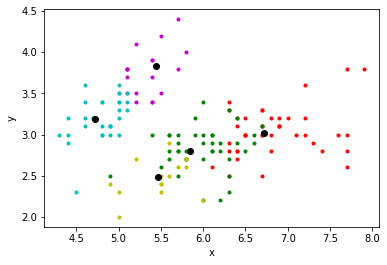

In [9]:
//**************************** PARTIE EXECUTION *******************************************************
val s = Source.fromFile("iris.data").getLines().toList
var k = new Kmeans(s,5)
var d = k.kmeans(50)

//fonction cd(donnes after kmeans, indice)
//k.cd retourne un Map[Int,Array[Float]] avec Int les differents K et Array avec les valeurs
var dicoX = k.cd(d,0)   //on prend le 1er valeur pour X et 2e pour Y 
var dicoY = k.cd(d,1)

//fonction cc(indice)
//k.cc retourne un Array[Float] avec valeur des centres
var cX = k.cc(0)
var cY = k.cc(1)

// donnees de chaque K ici 2 donc 0 et 1 --- si K = 3 donc 0,1 et 2 etc.
beakerx.x1 = dicoX(0)
beakerx.y1 = dicoY(0)
beakerx.x2 = dicoX(1)
beakerx.y2 = dicoY(1)
beakerx.x3 = dicoX(2)
beakerx.y3 = dicoY(2)
beakerx.x4 = dicoX(3)
beakerx.y4 = dicoY(3)
beakerx.x5 = dicoX(4)
beakerx.y5 = dicoY(4)

//donnes de chaque centre
beakerx.cx = cX
beakerx.cy = cY
//-------------------------------AFFICHAGE AVEC MATPLOTLIB--------------------------------------------
/*
ax.scatter(beakerx.x3, beakerx.y3, c='m', marker='.')
ax.scatter(beakerx.x4, beakerx.y4, c='c', marker='.')
ax.scatter(beakerx.x5, beakerx.y5, c='y', marker='.')
*/
%%python
from beakerx.object import beakerx
import matplotlib.pyplot as plt

ax = plt.gca()

ax.set_xlabel('x')
ax.set_ylabel('y')


ax.scatter(beakerx.x1, beakerx.y1, c='r', marker='.')
ax.scatter(beakerx.x2, beakerx.y2, c='g', marker='.')
ax.scatter(beakerx.x3, beakerx.y3, c='m', marker='.')
ax.scatter(beakerx.x4, beakerx.y4, c='c', marker='.')
ax.scatter(beakerx.x5, beakerx.y5, c='y', marker='.')

ax.scatter(beakerx.cx, beakerx.cy, c='k')

In [5]:
/*import scala.collection.mutable.ArrayBuffer

//--------------------------------------------------- point de depart
val x= ArrayBuffer[Float]()
var td = k.data
for(i <- 0 until td.length-1){
    x += k.data(i)(0)
}
val y= ArrayBuffer[Float]()
for(i <- 0 until td.length-1){
    y += k.data(i)(1)
}

beakerx.x = x.toArray
beakerx.y = y.toArray


//%%python
from beakerx.object import beakerx
import matplotlib.pyplot as plot

ax = plt.gca()

ax.set_xlabel('x')
ax.set_ylabel('y')


ax.scatter(beakerx.x, beakerx.y, c='r', marker='.') */


null

In [10]:
k.kmeans(50)(0)

[[6.9, 3.1, 4.9, 1.5, 0.0], [6.7, 3.0, 5.0, 1.7, 0.0], [6.3, 3.3, 6.0, 2.5, 0.0], [7.1, 3.0, 5.9, 2.1, 0.0], [6.3, 2.9, 5.6, 1.8, 0.0], [6.5, 3.0, 5.8, 2.2, 0.0], [7.6, 3.0, 6.6, 2.1, 0.0], [7.3, 2.9, 6.3, 1.8, 0.0], [6.7, 2.5, 5.8, 1.8, 0.0], [7.2, 3.6, 6.1, 2.5, 0.0], [6.5, 3.2, 5.1, 2.0, 0.0], [6.4, 2.7, 5.3, 1.9, 0.0], [6.8, 3.0, 5.5, 2.1, 0.0], [6.4, 3.2, 5.3, 2.3, 0.0], [6.5, 3.0, 5.5, 1.8, 0.0], [7.7, 3.8, 6.7, 2.2, 0.0], [7.7, 2.6, 6.9, 2.3, 0.0], [6.9, 3.2, 5.7, 2.3, 0.0], [7.7, 2.8, 6.7, 2.0, 0.0], [6.7, 3.3, 5.7, 2.1, 0.0], [7.2, 3.2, 6.0, 1.8, 0.0], [6.4, 2.8, 5.6, 2.1, 0.0], [7.2, 3.0, 5.8, 1.6, 0.0], [7.4, 2.8, 6.1, 1.9, 0.0], [7.9, 3.8, 6.4, 2.0, 0.0], [6.4, 2.8, 5.6, 2.2, 0.0], [7.7, 3.0, 6.1, 2.3, 0.0], [6.3, 3.4, 5.6, 2.4, 0.0], [6.4, 3.1, 5.5, 1.8, 0.0], [6.9, 3.1, 5.4, 2.1, 0.0], [6.7, 3.1, 5.6, 2.4, 0.0], [6.9, 3.1, 5.1, 2.3, 0.0], [6.8, 3.2, 5.9, 2.3, 0.0], [6.7, 3.3, 5.7, 2.5, 0.0], [6.7, 3.0, 5.2, 2.3, 0.0], [6.5, 3.0, 5.2, 2.0, 0.0], [6.2, 3.4, 5.4, 2.3, 0.0]]

In [11]:
k.kmeans(50)(1)

[[7.0, 3.2, 4.7, 1.4, 0.0], [6.4, 3.2, 4.5, 1.5, 0.0], [6.9, 3.1, 4.9, 1.5, 0.0], [6.5, 2.8, 4.6, 1.5, 0.0], [5.7, 2.8, 4.5, 1.3, 0.0], [6.3, 3.3, 4.7, 1.6, 0.0], [6.6, 2.9, 4.6, 1.3, 0.0], [5.9, 3.0, 4.2, 1.5, 0.0], [6.1, 2.9, 4.7, 1.4, 0.0], [6.7, 3.1, 4.4, 1.4, 0.0], [5.6, 3.0, 4.5, 1.5, 0.0], [6.2, 2.2, 4.5, 1.5, 0.0], [5.9, 3.2, 4.8, 1.8, 0.0], [6.3, 2.5, 4.9, 1.5, 0.0], [6.1, 2.8, 4.7, 1.2, 0.0], [6.4, 2.9, 4.3, 1.3, 0.0], [6.6, 3.0, 4.4, 1.4, 0.0], [6.8, 2.8, 4.8, 1.4, 0.0], [6.7, 3.0, 5.0, 1.7, 0.0], [6.0, 2.9, 4.5, 1.5, 0.0], [6.0, 2.7, 5.1, 1.6, 0.0], [5.4, 3.0, 4.5, 1.5, 0.0], [6.0, 3.4, 4.5, 1.6, 0.0], [6.7, 3.1, 4.7, 1.5, 0.0], [6.3, 2.3, 4.4, 1.3, 0.0], [6.1, 3.0, 4.6, 1.4, 0.0], [6.2, 2.9, 4.3, 1.3, 0.0], [5.8, 2.7, 5.1, 1.9, 0.0], [6.4, 2.7, 5.3, 1.9, 0.0], [5.7, 2.5, 5.0, 2.0, 0.0], [5.8, 2.8, 5.1, 2.4, 0.0], [6.0, 2.2, 5.0, 1.5, 0.0], [5.6, 2.8, 4.9, 2.0, 0.0], [6.3, 2.7, 4.9, 1.8, 0.0], [6.2, 2.8, 4.8, 1.8, 0.0], [6.1, 3.0, 4.9, 1.8, 0.0], [6.3, 2.8, 5.1, 1.5, 0.0], 

In [12]:
k.kmeans(50)(2)

[[5.1, 3.5, 1.4, 0.2, 0.0], [5.0, 3.6, 1.4, 0.2, 0.0], [5.4, 3.9, 1.7, 0.4, 0.0], [5.0, 3.4, 1.5, 0.2, 0.0], [5.4, 3.7, 1.5, 0.2, 0.0], [4.8, 3.4, 1.6, 0.2, 0.0], [5.8, 4.0, 1.2, 0.2, 0.0], [5.7, 4.4, 1.5, 0.4, 0.0], [5.4, 3.9, 1.3, 0.4, 0.0], [5.1, 3.5, 1.4, 0.3, 0.0], [5.7, 3.8, 1.7, 0.3, 0.0], [5.1, 3.8, 1.5, 0.3, 0.0], [5.4, 3.4, 1.7, 0.2, 0.0], [5.1, 3.7, 1.5, 0.4, 0.0], [5.1, 3.3, 1.7, 0.5, 0.0], [4.8, 3.4, 1.9, 0.2, 0.0], [5.0, 3.4, 1.6, 0.4, 0.0], [5.2, 3.5, 1.5, 0.2, 0.0], [5.2, 3.4, 1.4, 0.2, 0.0], [5.4, 3.4, 1.5, 0.4, 0.0], [5.2, 4.1, 1.5, 0.1, 0.0], [5.5, 4.2, 1.4, 0.2, 0.0], [5.5, 3.5, 1.3, 0.2, 0.0], [5.1, 3.4, 1.5, 0.2, 0.0], [5.0, 3.5, 1.3, 0.3, 0.0], [5.0, 3.5, 1.6, 0.6, 0.0], [5.1, 3.8, 1.9, 0.4, 0.0], [5.1, 3.8, 1.6, 0.2, 0.0], [5.3, 3.7, 1.5, 0.2, 0.0], [5.0, 3.3, 1.4, 0.2, 0.0]]

In [13]:
k.kmeans(50)(3)

[[4.9, 3.0, 1.4, 0.2, 0.0], [4.7, 3.2, 1.3, 0.2, 0.0], [4.6, 3.1, 1.5, 0.2, 0.0], [4.6, 3.4, 1.4, 0.3, 0.0], [4.4, 2.9, 1.4, 0.2, 0.0], [4.9, 3.1, 1.5, 0.1, 0.0], [4.8, 3.0, 1.4, 0.1, 0.0], [4.3, 3.0, 1.1, 0.1, 0.0], [4.6, 3.6, 1.0, 0.2, 0.0], [5.0, 3.0, 1.6, 0.2, 0.0], [4.7, 3.2, 1.6, 0.2, 0.0], [4.8, 3.1, 1.6, 0.2, 0.0], [4.9, 3.1, 1.5, 0.1, 0.0], [4.9, 3.1, 1.5, 0.1, 0.0], [4.4, 3.0, 1.3, 0.2, 0.0], [4.5, 2.3, 1.3, 0.3, 0.0], [4.4, 3.2, 1.3, 0.2, 0.0], [4.8, 3.0, 1.4, 0.3, 0.0], [4.6, 3.2, 1.4, 0.2, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]

In [14]:
k.kmeans(50)(4)

[[5.5, 2.3, 4.0, 1.3, 0.0], [5.7, 2.8, 4.5, 1.3, 0.0], [4.9, 2.4, 3.3, 1.0, 0.0], [5.2, 2.7, 3.9, 1.4, 0.0], [5.0, 2.0, 3.5, 1.0, 0.0], [5.9, 3.0, 4.2, 1.5, 0.0], [6.0, 2.2, 4.0, 1.0, 0.0], [5.6, 2.9, 3.6, 1.3, 0.0], [5.8, 2.7, 4.1, 1.0, 0.0], [5.6, 2.5, 3.9, 1.1, 0.0], [6.1, 2.8, 4.0, 1.3, 0.0], [5.7, 2.6, 3.5, 1.0, 0.0], [5.5, 2.4, 3.8, 1.1, 0.0], [5.5, 2.4, 3.7, 1.0, 0.0], [5.8, 2.7, 3.9, 1.2, 0.0], [5.4, 3.0, 4.5, 1.5, 0.0], [5.6, 3.0, 4.1, 1.3, 0.0], [5.5, 2.5, 4.0, 1.3, 0.0], [5.5, 2.6, 4.4, 1.2, 0.0], [5.8, 2.6, 4.0, 1.2, 0.0], [5.0, 2.3, 3.3, 1.0, 0.0], [5.6, 2.7, 4.2, 1.3, 0.0], [5.7, 3.0, 4.2, 1.2, 0.0], [5.7, 2.9, 4.2, 1.3, 0.0], [5.1, 2.5, 3.0, 1.1, 0.0], [5.7, 2.8, 4.1, 1.3, 0.0], [4.9, 2.5, 4.5, 1.7, 0.0]]

In [ ]:
k.tabCentre

In [7]:
k.data

[[5.1, 3.5, 1.4, 0.2, 0.0], [4.9, 3.0, 1.4, 0.2, 0.0], [4.7, 3.2, 1.3, 0.2, 0.0], [4.6, 3.1, 1.5, 0.2, 0.0], [5.0, 3.6, 1.4, 0.2, 0.0], [5.4, 3.9, 1.7, 0.4, 0.0], [4.6, 3.4, 1.4, 0.3, 0.0], [5.0, 3.4, 1.5, 0.2, 0.0], [4.4, 2.9, 1.4, 0.2, 0.0], [4.9, 3.1, 1.5, 0.1, 0.0], [5.4, 3.7, 1.5, 0.2, 0.0], [4.8, 3.4, 1.6, 0.2, 0.0], [4.8, 3.0, 1.4, 0.1, 0.0], [4.3, 3.0, 1.1, 0.1, 0.0], [5.8, 4.0, 1.2, 0.2, 0.0], [5.7, 4.4, 1.5, 0.4, 0.0], [5.4, 3.9, 1.3, 0.4, 0.0], [5.1, 3.5, 1.4, 0.3, 0.0], [5.7, 3.8, 1.7, 0.3, 0.0], [5.1, 3.8, 1.5, 0.3, 0.0], [5.4, 3.4, 1.7, 0.2, 0.0], [5.1, 3.7, 1.5, 0.4, 0.0], [4.6, 3.6, 1.0, 0.2, 0.0], [5.1, 3.3, 1.7, 0.5, 0.0], [4.8, 3.4, 1.9, 0.2, 0.0], [5.0, 3.0, 1.6, 0.2, 0.0], [5.0, 3.4, 1.6, 0.4, 0.0], [5.2, 3.5, 1.5, 0.2, 0.0], [5.2, 3.4, 1.4, 0.2, 0.0], [4.7, 3.2, 1.6, 0.2, 0.0], [4.8, 3.1, 1.6, 0.2, 0.0], [5.4, 3.4, 1.5, 0.4, 0.0], [5.2, 4.1, 1.5, 0.1, 0.0], [5.5, 4.2, 1.4, 0.2, 0.0], [4.9, 3.1, 1.5, 0.1, 0.0], [5.0, 3.2, 1.2, 0.2, 0.0], [5.5, 3.5, 1.3, 0.2, 0.0], 

In [ ]:
k.distance(k.data(0),k.data(1))

In [ ]:
k.moyenne(k.data)